In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!apt-get install openjdk-8-jdk-headless -qq 

In [ ]:
!sudo add-apt-repository ppa:webupd8team/java
!sudo apt-get update
!sudo apt-get install oracle-java8-installer

 The Oracle JDK License has changed for releases starting April 16, 2019.

The new Oracle Technology Network License Agreement for Oracle Java SE is substantially different from prior Oracle JDK licenses. The new license permits certain uses, such as personal use and development use, at no cost -- but other uses authorized under prior Oracle JDK licenses may no longer be available. Please review the terms carefully before downloading and using this product. An FAQ is available here: https://www.oracle.com/technetwork/java/javase/overview/oracle-jdk-faqs.html

Oracle Java downloads now require logging in to an Oracle account to download Java updates, like the latest Oracle Java 8u211 / Java SE 8u212. Because of this I cannot update the PPA with the latest Java (and the old links were broken by Oracle).

For this reason, THIS PPA IS DISCONTINUED.

UPDATE:

For Oracle Java 17, see a different PPA -> https://www.linuxuprising.com/2021/09/how-to-install-oracle-java-17-lts-on.html

Old descr

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder \
      .master("local") \
      .appName("Proje") \
      .config("spark.executor.memory", "12gb") \
      .getOrCreate()
    
sc = spark.sparkContext

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/CICMalMem2022_Malware_Classification/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Proje


In [ ]:
import sys
import tensorflow.keras
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sbn
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("Obfuscated-MalMem2022.csv")

In [ ]:
dataset.tail(5)

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,Malware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,Malware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,Malware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,Malware
58595,Ransomware-Shade-955d9af38346c1755527bd196668e...,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,...,221,26,24,116,0,120,86,0,8,Malware


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [ ]:
dataset.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [ ]:
dataset.Class.value_counts()

Benign     29298
Malware    29298
Name: Class, dtype: int64

In [ ]:
dataset["Category"].describe()

count      58596
unique     28346
top       Benign
freq       29298
Name: Category, dtype: object

In [ ]:
dataset["Category"].to_numpy()
attack_type=[]
for i in dataset["Category"]:
    if "Benign" in i:
        attack_type.append("Benign")
    elif "Ransomware" in i:
        attack_type.append("Ransomware")
    elif "Spyware" in i:
        attack_type.append("Spyware")
    elif "Trojan" in i:
        attack_type.append("Trojan")           
dataset["Class"]=attack_type

In [ ]:
dataset.Class.value_counts()

Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: Class, dtype: int64

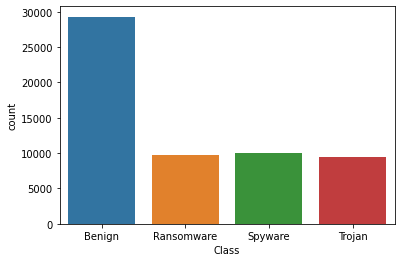

In [ ]:
sbn.countplot(x="Class", data = dataset)

In [ ]:
dataset = dataset.iloc[:,1:]

In [ ]:
dataset = spark.createDataFrame(dataset)

In [ ]:
dataset = dataset.toDF(*(c.replace('.', '_') for c in dataset.columns))

In [ ]:
dataset.drop("Class").toPandas().columns

Index(['pslist_nproc', 'pslist_nppid', 'pslist_avg_threads',
       'pslist_nprocs64bit', 'pslist_avg_handlers', 'dlllist_ndlls',
       'dlllist_avg_dlls_per_proc', 'handles_nhandles',
       'handles_avg_handles_per_proc', 'handles_nport', 'handles_nfile',
       'handles_nevent', 'handles_ndesktop', 'handles_nkey', 'handles_nthread',
       'handles_ndirectory', 'handles_nsemaphore', 'handles_ntimer',
       'handles_nsection', 'handles_nmutant', 'ldrmodules_not_in_load',
       'ldrmodules_not_in_init', 'ldrmodules_not_in_mem',
       'ldrmodules_not_in_load_avg', 'ldrmodules_not_in_init_avg',
       'ldrmodules_not_in_mem_avg', 'malfind_ninjections',
       'malfind_commitCharge', 'malfind_protection',
       'malfind_uniqueInjections', 'psxview_not_in_pslist',
       'psxview_not_in_eprocess_pool', 'psxview_not_in_ethread_pool',
       'psxview_not_in_pspcid_list', 'psxview_not_in_csrss_handles',
       'psxview_not_in_session', 'psxview_not_in_deskthrd',
       'psxview_not_in_p

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer,VectorAssembler,Normalizer

indexer = StringIndexer(inputCol="Class", outputCol="Class_encoded")

assemblerInput = ['pslist_nproc','pslist_nppid','pslist_avg_threads',
 'pslist_nprocs64bit','pslist_avg_handlers','dlllist_ndlls',
 'dlllist_avg_dlls_per_proc','handles_nhandles','handles_avg_handles_per_proc',
 'handles_nport','handles_nfile','handles_nevent','handles_ndesktop',
 'handles_nkey','handles_nthread','handles_ndirectory','handles_nsemaphore',
 'handles_ntimer','handles_nsection','handles_nmutant','ldrmodules_not_in_load',
 'ldrmodules_not_in_init','ldrmodules_not_in_mem','ldrmodules_not_in_load_avg',
 'ldrmodules_not_in_init_avg','ldrmodules_not_in_mem_avg','malfind_ninjections',
 'malfind_commitCharge','malfind_protection','malfind_uniqueInjections',
 'psxview_not_in_pslist','psxview_not_in_eprocess_pool','psxview_not_in_ethread_pool',
 'psxview_not_in_pspcid_list','psxview_not_in_csrss_handles','psxview_not_in_session',
 'psxview_not_in_deskthrd','psxview_not_in_pslist_false_avg',
 'psxview_not_in_eprocess_pool_false_avg','psxview_not_in_ethread_pool_false_avg',
 'psxview_not_in_pspcid_list_false_avg','psxview_not_in_csrss_handles_false_avg',
 'psxview_not_in_session_false_avg','psxview_not_in_deskthrd_false_avg',
 'modules_nmodules','svcscan_nservices','svcscan_kernel_drivers','svcscan_fs_drivers',
 'svcscan_process_services','svcscan_shared_process_services',
 'svcscan_interactive_process_services','svcscan_nactive','callbacks_ncallbacks',
 'callbacks_nanonymous','callbacks_ngeneric']

assembler = VectorAssembler(inputCols= assemblerInput,  outputCol='vectorized_features')

normalizer =Normalizer().setP(1).setInputCol("vectorized_features").setOutputCol("normalized_features")

pipeline = Pipeline(stages= [indexer] + [assembler] + [normalizer])
model=pipeline.fit(dataset)
data_son = model.transform(dataset).select("normalized_features","Class_encoded","Class")


In [ ]:
data_son.show(2)

+--------------------+-------------+------+
| normalized_features|Class_encoded| Class|
+--------------------+-------------+------+
|[0.00229754282625...|          0.0|Benign|
|[0.00194946106209...|          0.0|Benign|
+--------------------+-------------+------+
only showing top 2 rows



In [ ]:
from pyspark.ml.feature import VarianceThresholdSelector

selector= VarianceThresholdSelector(varianceThreshold= 0.0 ,
                                    featuresCol="normalized_features", outputCol="selected_features")
selected_features = selector.fit(data_son).transform(data_son)

In [ ]:
selected_features.show(2)

+--------------------+-------------+------+--------------------+
| normalized_features|Class_encoded| Class|   selected_features|
+--------------------+-------------+------+--------------------+
|[0.00229754282625...|          0.0|Benign|[0.00229754282625...|
|[0.00194946106209...|          0.0|Benign|[0.00194946106209...|
+--------------------+-------------+------+--------------------+
only showing top 2 rows



In [ ]:
train_data,test_data = selected_features.randomSplit([0.8,0.2], seed=123)

In [ ]:
# **********************RANDOM FOREST ALGORİTMASI*******************
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

rf = RandomForestClassifier(labelCol='Class_encoded', featuresCol='selected_features')
evaluator = MulticlassClassificationEvaluator(labelCol="Class_encoded", predictionCol="prediction")
grid = ParamGridBuilder().addGrid(rf.maxDepth,[5]).build()

rf_cv = CrossValidator(estimator=rf, estimatorParamMaps=grid, evaluator=evaluator, numFolds=10)
rfModel = rf_cv.fit(train_data)
prediction1 = rfModel.transform(test_data)

In [ ]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(prediction1)
print("Accuracy = %g" % (accuracy))

evaluator = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="f1")
F1_Score = evaluator.evaluate(prediction1)
print("F1 Score = %g" % (F1_Score))

evaluator = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="weightedPrecision")
Precision = evaluator.evaluate(prediction1)
print("Precision = %g" % (Precision))

evaluator = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="weightedRecall")
Recall = evaluator.evaluate(prediction1)
print("Recall = %g" % (Recall))

Accuracy = 0.757447
F1 Score = 0.751793
Precision = 0.77659
Recall = 0.757447


In [ ]:
selected_features.groupBy("Class_encoded", "Class").count().sort("count", ascending=False).show()

+-------------+----------+-----+
|Class_encoded|     Class|count|
+-------------+----------+-----+
|          0.0|    Benign|29298|
|          1.0|   Spyware|10020|
|          2.0|Ransomware| 9791|
|          3.0|    Trojan| 9487|
+-------------+----------+-----+



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = prediction1.select("Class_encoded").toPandas()
y_pred = prediction1.select("prediction").toPandas()

target_names = ["Benign","Spyware","Ransomware","Trojan"]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5901
     Spyware       0.69      0.44      0.54      2075
  Ransomware       0.51      0.34      0.41      1958
      Trojan       0.45      0.79      0.57      1849

    accuracy                           0.76     11783
   macro avg       0.66      0.64      0.63     11783
weighted avg       0.78      0.76      0.75     11783



In [ ]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[5882,   16,    1,    2],
       [   7,  912,  352,  804],
       [   1,  302,  664,  991],
       [   4,   88,  290, 1467]])

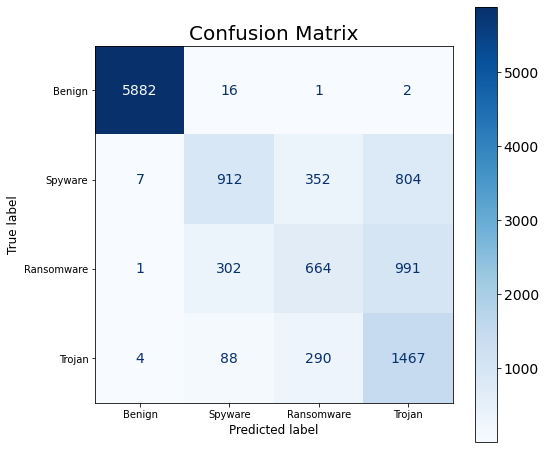

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm,display_labels=target_names)
fig, ax, = plt.subplots(figsize=(8,8))
ax.set_title('Confusion Matrix', fontdict = {'fontsize': 20})
ax.set_xlabel("Predicted labels", fontdict = {'fontsize': 12})
ax.set_ylabel('True labels', fontdict = {'fontsize': 12})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [ ]:
# **********************DECISION TREE ALGORİTMASI*******************
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

dt = DecisionTreeClassifier(labelCol='Class_encoded', featuresCol='selected_features')
evaluator = MulticlassClassificationEvaluator(labelCol="Class_encoded", predictionCol="prediction")
grid = ParamGridBuilder().addGrid(dt.maxDepth,[5]).build()

dt_cv = CrossValidator(estimator=dt, estimatorParamMaps=grid, evaluator=evaluator, numFolds=10)
dtModel = dt_cv.fit(train_data)
prediction2 = dtModel.transform(test_data)


In [ ]:
accuracy = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="accuracy").evaluate(prediction2)
print("Accuracy = %g" % (accuracy))

F1_Score = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="f1").evaluate(prediction2)
print("F1 Score = %g" % (F1_Score))

Precision  = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="weightedPrecision").evaluate(prediction2)
print("Precision = %g" % (Precision))

Recall = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="weightedRecall").evaluate(prediction2)
print("Recall = %g" % (Recall))

Accuracy = 0.770262
F1 Score = 0.771212
Precision = 0.787941
Recall = 0.770262


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = prediction2.select("Class_encoded").toPandas()
y_pred = prediction2.select("prediction").toPandas()

target_names = ["Benign","Spyware","Ransomware","Trojan"]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00      5901
     Spyware       0.71      0.45      0.55      2075
  Ransomware       0.46      0.66      0.54      1958
      Trojan       0.55      0.53      0.54      1849

    accuracy                           0.77     11783
   macro avg       0.68      0.66      0.66     11783
weighted avg       0.79      0.77      0.77     11783



In [ ]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[5870,   17,    2,   12],
       [   2,  943,  710,  420],
       [   0,  297, 1289,  372],
       [   0,   72,  803,  974]])

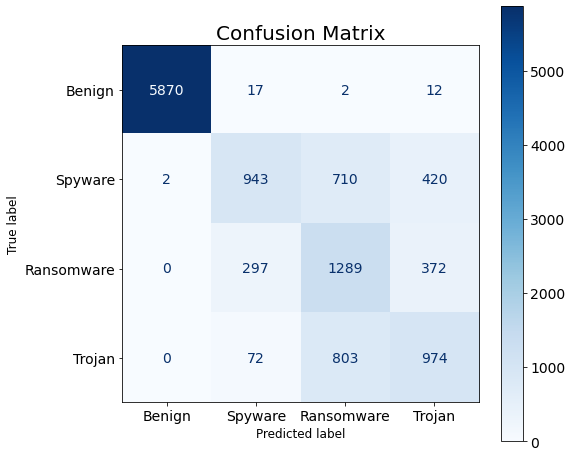

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm,display_labels=target_names)
fig, ax, = plt.subplots(figsize=(8,8))
ax.set_title('Confusion Matrix', fontdict = {'fontsize': 20})
ax.set_xlabel("Predicted labels", fontdict = {'fontsize': 12})
ax.set_ylabel('True labels', fontdict = {'fontsize': 12})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [ ]:
# **********************NAIVE BAYES ALGORİTMASI*******************
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

nb = NaiveBayes(labelCol='Class_encoded', featuresCol='selected_features', modelType="gaussian")
evaluator = MulticlassClassificationEvaluator(labelCol="Class_encoded", predictionCol="prediction")
grid = ParamGridBuilder().addGrid(nb.smoothing, [0.0, 0.2, 0.4]).build()

nb_cv = CrossValidator(estimator=nb, estimatorParamMaps=grid, evaluator=evaluator, numFolds=10)
nbModel = nb_cv.fit(train_data)
prediction3 = nbModel.transform(test_data)


In [ ]:
accuracy = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="accuracy").evaluate(prediction3)
print("Accuracy = %g" % (accuracy))

F1_Score = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="f1").evaluate(prediction3)
print("F1 Score = %g" % (F1_Score))

Precision  = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="weightedPrecision").evaluate(prediction3)
print("Precision = %g" % (Precision))

Recall = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="weightedRecall").evaluate(prediction3)
print("Recall = %g" % (Recall))

Accuracy = 0.679199
F1 Score = 0.63851
Precision = 0.743517
Recall = 0.679199


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = prediction3.select("Class_encoded").toPandas()
y_pred = prediction3.select("prediction").toPandas()

target_names = ["Benign","Spyware","Ransomware","Trojan"]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

      Benign       1.00      0.97      0.98      5901
     Spyware       0.50      0.24      0.33      2075
  Ransomware       0.61      0.03      0.05      1958
      Trojan       0.35      0.93      0.51      1849

    accuracy                           0.68     11783
   macro avg       0.61      0.54      0.47     11783
weighted avg       0.74      0.68      0.64     11783



In [ ]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[5728,  102,    5,   66],
       [   6,  501,   23, 1545],
       [   0,  278,   54, 1626],
       [   0,  122,    7, 1720]])

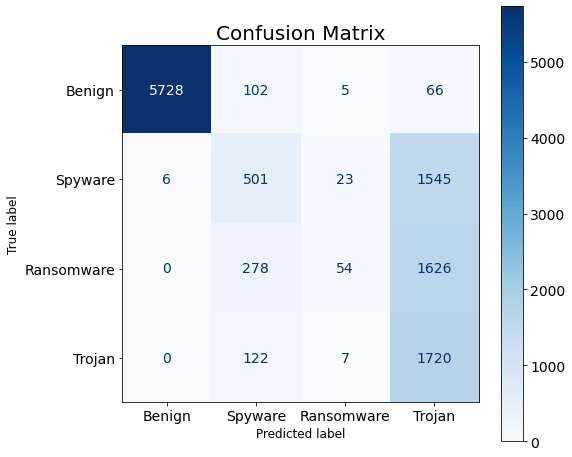

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm,display_labels=target_names)
fig, ax, = plt.subplots(figsize=(8,8))
ax.set_title('Confusion Matrix', fontdict = {'fontsize': 20})
ax.set_xlabel("Predicted labels", fontdict = {'fontsize': 12})
ax.set_ylabel('True labels', fontdict = {'fontsize': 12})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [ ]:
#********************** LOGISTIC RESGRESSION ALGORİTMASI*******************
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

lgr = LogisticRegression(labelCol='Class_encoded', featuresCol='selected_features')
evaluator = MulticlassClassificationEvaluator(labelCol="Class_encoded", predictionCol="prediction")
grid = ParamGridBuilder().addGrid(lgr.elasticNetParam,[0.2, 0.6]).addGrid(lgr.regParam, [0.1, 0.01]).build()

lgr_cv= CrossValidator(estimator=lgr, estimatorParamMaps=grid, evaluator=evaluator, numFolds=10)
lgrModel = lgr_cv.fit(train_data)
prediction4 = lgrModel.transform(test_data)

In [ ]:
accuracy = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="accuracy").evaluate(prediction4)
print("Accuracy = %g" % (accuracy))

F1_Score = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="f1").evaluate(prediction4)
print("F1 Score = %g" % (F1_Score))

Precision  = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="weightedPrecision").evaluate(prediction4)
print("Precision = %g" % (Precision))

Recall = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="weightedRecall").evaluate(prediction4)
print("Recall = %g" % (Recall))

Accuracy = 0.711788
F1 Score = 0.703988
Precision = 0.720646
Recall = 0.711788


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = prediction4.select("Class_encoded").toPandas()
y_pred = prediction4.select("prediction").toPandas()

target_names = ["Benign","Spyware","Ransomware","Trojan"]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99      5901
     Spyware       0.48      0.38      0.42      2075
  Ransomware       0.49      0.26      0.34      1958
      Trojan       0.39      0.66      0.49      1849

    accuracy                           0.71     11783
   macro avg       0.59      0.57      0.56     11783
weighted avg       0.72      0.71      0.70     11783



In [ ]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[5872,   27,    0,    2],
       [  48,  779,  302,  946],
       [   6,  452,  516,  984],
       [  20,  368,  241, 1220]])

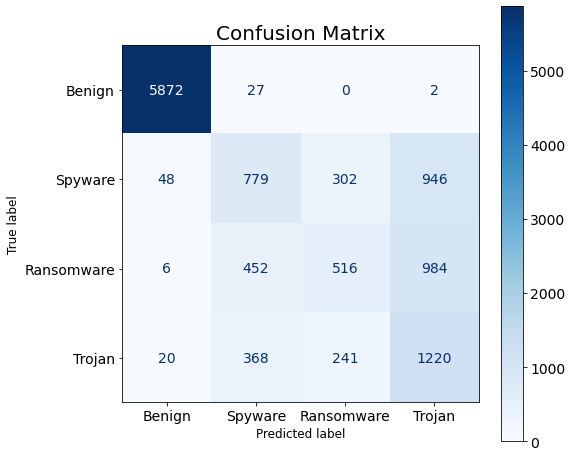

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm,display_labels=target_names)
fig, ax, = plt.subplots(figsize=(8,8))
ax.set_title('Confusion Matrix', fontdict = {'fontsize': 20})
ax.set_xlabel("Predicted labels", fontdict = {'fontsize': 12})
ax.set_ylabel('True labels', fontdict = {'fontsize': 12})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [ ]:
#********************** MULTILAYER PERCEPTRON ALGORİTMASI*******************

layers = [52,36,15,4] 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

mpc = MultilayerPerceptronClassifier(labelCol='Class_encoded', 
                                     featuresCol="selected_features",layers=layers, blockSize=128, seed=123)

evaluator = MulticlassClassificationEvaluator(labelCol="Class_encoded", predictionCol="prediction")
grid = ParamGridBuilder().addGrid(mpc.maxIter,[50,100]).build()

mpc_cv= CrossValidator(estimator=mpc, estimatorParamMaps=grid, evaluator=evaluator, numFolds=10)
mpcModel = mpc_cv.fit(train_data)
predictions5 = mpcModel.transform(test_data)

In [ ]:
accuracy = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="accuracy").evaluate(predictions5)
print("Accuracy = %g" % (accuracy))

F1_Score = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="f1").evaluate(predictions5)
print("F1 Score = %g" % (F1_Score))

Precision  = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="weightedPrecision").evaluate(predictions5)
print("Precision = %g" % (Precision))

Recall = MulticlassClassificationEvaluator(
    labelCol="Class_encoded", predictionCol="prediction", metricName="weightedRecall").evaluate(predictions5)
print("Recall = %g" % (Recall))

Accuracy = 0.651277
F1 Score = 0.653266
Precision = 0.660321
Recall = 0.651277


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = predictions5.select("Class_encoded").toPandas()
y_pred = predictions5.select("prediction").toPandas()

target_names = ["Benign","Spyware","Ransomware","Trojan"]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98      5901
     Spyware       0.36      0.32      0.34      2075
  Ransomware       0.33      0.27      0.30      1958
      Trojan       0.30      0.43      0.36      1849

    accuracy                           0.65     11783
   macro avg       0.50      0.49      0.49     11783
weighted avg       0.66      0.65      0.65     11783



In [ ]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[5701,   18,    0,  182],
       [  31,  655,  605,  784],
       [  30,  558,  524,  846],
       [  19,  573,  463,  794]])

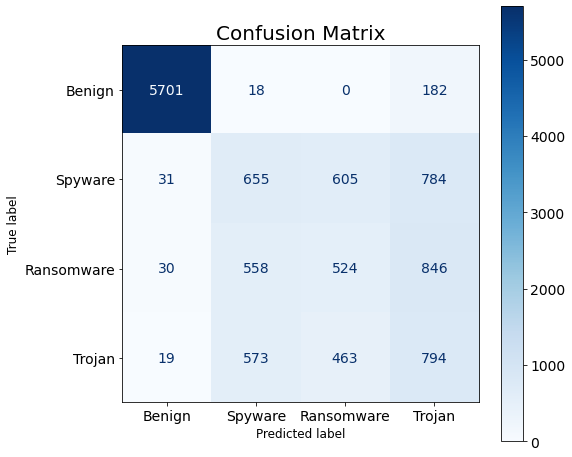

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm,display_labels=target_names)
fig, ax, = plt.subplots(figsize=(8,8))
ax.set_title('Confusion Matrix', fontdict = {'fontsize': 20})
ax.set_xlabel("Predicted labels", fontdict = {'fontsize': 12})
ax.set_ylabel('True labels', fontdict = {'fontsize': 12})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [ ]:
xtrain_array = np.array(train_data.select('selected_features').collect())
xtest_array = np.array(test_data.select('selected_features').collect())
ytrain_array = np.array(train_data.select('Class_encoded').collect())
ytest_array = np.array(test_data.select('Class_encoded').collect())

In [ ]:
import tensorflow.keras.utils as u
ytrain_OHE = u.to_categorical(ytrain_array)
ytest_OHE = u.to_categorical(ytest_array)

In [ ]:
print(ytrain_OHE.shape)
print(ytest_OHE.shape)
print(xtrain_array.shape)
print(xtest_array.shape)

(46813, 4)
(11783, 4)
(46813, 1, 52)
(11783, 1, 52)


In [ ]:
xtrain_array= xtrain_array.reshape(-1,52)
xtest_array= xtest_array.reshape(-1,52)

In [ ]:
print(ytrain_OHE.shape)
print(ytest_OHE.shape)
print(xtrain_array.shape)
print(xtest_array.shape)

(46813, 4)
(11783, 4)
(46813, 52)
(11783, 52)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(52,activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(30,activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(30,activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(4,activation = "softmax"))

model.compile(loss="categorical_crossentropy",optimizer = "adam")

earlyStopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25) 

model.fit(xtrain_array, ytrain_OHE, epochs=10, 
          validation_data=(xtest_array, ytest_OHE),verbose=1, callbacks=[earlyStopping])

Epoch 1/10
1463/1463 [==============================] - 5s 3ms/step - loss: 0.9953 - val_loss: 0.6154
Epoch 2/10
1463/1463 [==============================] - 3s 2ms/step - loss: 0.6621 - val_loss: 0.6188
Epoch 3/10
1463/1463 [==============================] - 3s 2ms/step - loss: 0.6513 - val_loss: 0.6142
Epoch 4/10
1463/1463 [==============================] - 4s 3ms/step - loss: 0.6376 - val_loss: 0.6125
Epoch 5/10
1463/1463 [==============================] - 3s 2ms/step - loss: 0.6379 - val_loss: 0.6088
Epoch 6/10
1463/1463 [==============================] - 6s 4ms/step - loss: 0.6335 - val_loss: 0.6085
Epoch 7/10
1463/1463 [==============================] - 5s 4ms/step - loss: 0.6339 - val_loss: 0.5988
Epoch 8/10
1463/1463 [==============================] - 4s 3ms/step - loss: 0.6260 - val_loss: 0.6109
Epoch 9/10
1463/1463 [==============================] - 5s 4ms/step - loss: 0.6260 - val_loss: 0.6039
Epoch 10/10
1463/1463 [==============================] - 5s 3ms/step - loss: 0.625

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 52)                2756      
                                                                 
 dropout (Dropout)           (None, 52)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1590      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1

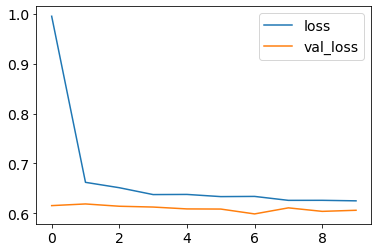

In [ ]:
kayipDf = pd.DataFrame(model.history.history)
kayipDf.plot()

In [ ]:
y_pred = model.predict(xtest_array)
y_pred=np.argmax(y_pred, axis=1)
ytest_OHE =np.argmax(ytest_OHE, axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

target_names =  ["Benign","Spyware","Ransomware","Trojan"]
print(classification_report(ytest_OHE,y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99      5901
     Spyware       0.56      0.13      0.21      2075
  Ransomware       0.35      0.01      0.02      1958
      Trojan       0.34      0.98      0.51      1849

    accuracy                           0.68     11783
   macro avg       0.56      0.53      0.43     11783
weighted avg       0.71      0.68      0.62     11783



In [ ]:
cm= confusion_matrix(ytest_array,y_pred)
cm

array([[5876,    0,    0,   25],
       [  30,  275,   32, 1738],
       [  17,  190,   23, 1728],
       [   9,   23,   10, 1807]])

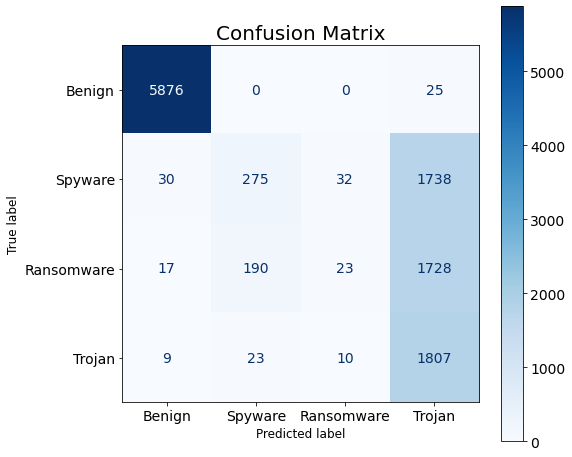

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm,display_labels=target_names)
fig, ax, = plt.subplots(figsize=(8,8))
ax.set_title('Confusion Matrix', fontdict = {'fontsize': 20})
ax.set_xlabel("Predicted labels", fontdict = {'fontsize': 12})
ax.set_ylabel('True labels', fontdict = {'fontsize': 12})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [ ]:
xtrain_array = np.array(train_data.select('normalized_features').collect())
xtest_array = np.array(test_data.select('normalized_features').collect())
ytrain_array = np.array(train_data.select('Class_encoded').collect())
ytest_array = np.array(test_data.select('Class_encoded').collect())

In [ ]:
import tensorflow.keras.utils as u
ytrain_OHE = u.to_categorical(ytrain_array)
ytest_OHE = u.to_categorical(ytest_array)

In [ ]:
print(ytrain_OHE.shape)
print(ytest_OHE.shape)
print(xtrain_array.shape)
print(xtest_array.shape)

(46813, 4)
(11783, 4)
(46813, 1, 55)
(11783, 1, 55)


In [ ]:
model = Sequential()

model.add(layers.LSTM(64, activation = "relu", return_sequences = True))
model.add(Dropout(0.6))

model.add(layers.LSTM(64, activation = "relu", return_sequences = False))
model.add(Dropout(0.6))

model.add(Dense(4,activation = "softmax"))

model.compile(loss="categorical_crossentropy",optimizer = "adam")

earlyStopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

model.fit(xtrain_array, ytrain_OHE, epochs=10, 
          validation_data=(xtest_array, ytest_OHE),verbose=1, callbacks=[earlyStopping])

Epoch 1/10
1463/1463 [==============================] - 11s 6ms/step - loss: 0.9755 - val_loss: 0.6438
Epoch 2/10
1463/1463 [==============================] - 10s 6ms/step - loss: 0.6458 - val_loss: 0.5976
Epoch 3/10
1463/1463 [==============================] - 11s 7ms/step - loss: 0.6213 - val_loss: 0.5976
Epoch 4/10
1463/1463 [==============================] - 7s 5ms/step - loss: 0.6103 - val_loss: 0.5823
Epoch 5/10
1463/1463 [==============================] - 6s 4ms/step - loss: 0.6023 - val_loss: 0.5796
Epoch 6/10
1463/1463 [==============================] - 10s 7ms/step - loss: 0.5965 - val_loss: 0.5743
Epoch 7/10
1463/1463 [==============================] - 9s 6ms/step - loss: 0.5912 - val_loss: 0.5766
Epoch 8/10
1463/1463 [==============================] - 7s 5ms/step - loss: 0.5865 - val_loss: 0.5705
Epoch 9/10
1463/1463 [==============================] - 6s 4ms/step - loss: 0.5848 - val_loss: 0.5721
Epoch 10/10
1463/1463 [==============================] - 7s 5ms/step - loss: 0

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             30720     
                                                                 
 dropout_3 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 4)                 260       
                                                                 
Total params: 64,004
Trainable params: 64,004
Non-trainable params: 0
_________________________________________________________________


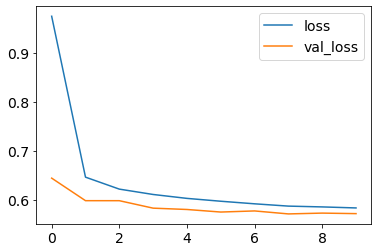

In [ ]:
kayipDf = pd.DataFrame(model.history.history)
kayipDf.plot()

In [ ]:
y_pred = model.predict(xtest_array)

In [ ]:
y_pred=np.argmax(y_pred, axis=1)
ytest_OHE =np.argmax(ytest_OHE, axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

target_names =  ["Benign","Spyware","Ransomware","Trojan"]
print(classification_report(ytest_OHE,y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99      5901
     Spyware       0.54      0.18      0.27      2075
  Ransomware       1.00      0.00      0.00      1958
      Trojan       0.35      0.97      0.51      1849

    accuracy                           0.68     11783
   macro avg       0.72      0.54      0.44     11783
weighted avg       0.81      0.68      0.63     11783



In [ ]:
cm= confusion_matrix(ytest_OHE,y_pred)
cm

array([[5881,    1,    0,   19],
       [  26,  372,    0, 1677],
       [  17,  256,    2, 1683],
       [   7,   55,    0, 1787]])

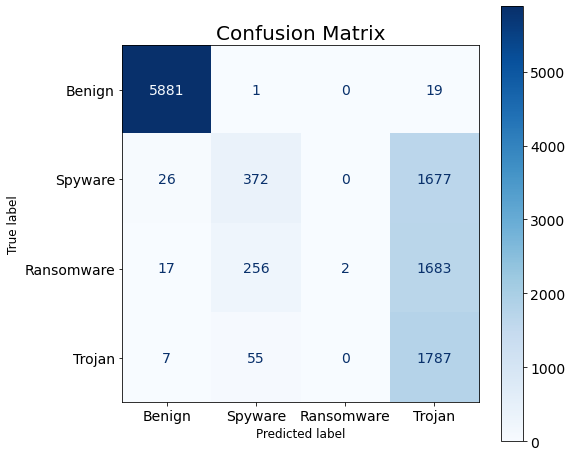

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm,display_labels=target_names)
fig, ax, = plt.subplots(figsize=(8,8))
ax.set_title('Confusion Matrix', fontdict = {'fontsize': 20})
ax.set_xlabel("Predicted labels", fontdict = {'fontsize': 12})
ax.set_ylabel('True labels', fontdict = {'fontsize': 12})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()